Error fetching real-time CO₂ data: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
CO₂ Contribution & Removal Data:


,Category,CO₂ Contributions (Gt),CO₂ Removals (Gt)
0,CO₂ Emissions,100,0
1,Legacy CO₂,80,0
2,Feedback Loops,60,0
3,Total CO₂,0,140
4,Carbon Gap,0,100
5,Active Removal,0,40



Carbon Analysis Insights:
Total CO₂ to be removed: 140 Gt
Current Active Removal: 40 Gt
Carbon Gap (Unaddressed CO₂): 100 Gt


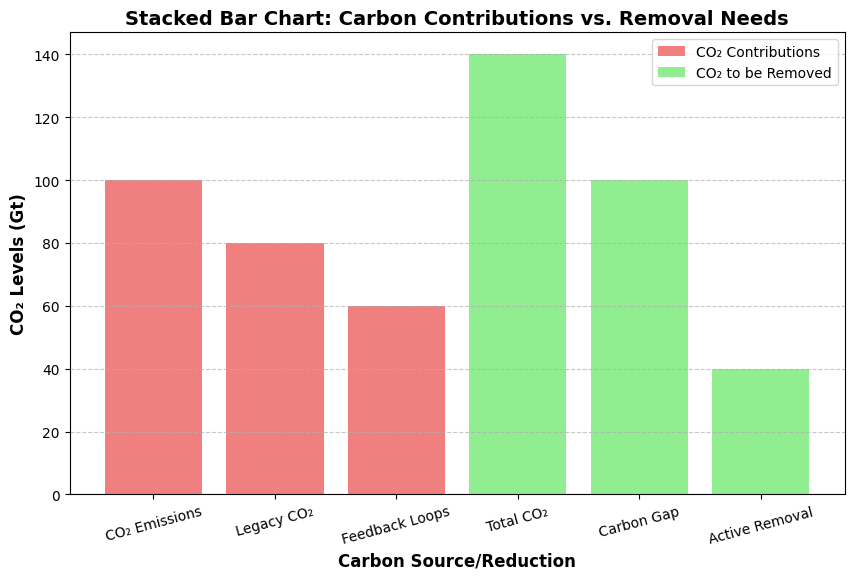


Economic Feasibility Analysis:
Carbon Gap to Address: 100.0 Gt (or 100,000,000,000.0 tonnes)
Estimated Cost using Direct Air Capture: $15.00 Trillion
Estimated Cost using Nature-Based Solutions: $5.00 Trillion


In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

# Step 1: Function to Fetch Real-Time CO₂ Data from NOAA API
def fetch_real_time_co2():
    """Fetches real-time atmospheric CO₂ concentration data from NOAA API."""
    url = "https://gml.noaa.gov/webdata/ccgg/trends/co2_trend_mlo.json"
    try:
        response = requests.get(url)
        data = response.json()
        latest_co2 = data['trend'][-1]  # Fetch latest CO₂ ppm data
        print(f"Latest Atmospheric CO₂ Concentration: {latest_co2} ppm")
        return latest_co2
    except Exception as e:
        print("Error fetching real-time CO₂ data:", e)
        return None

# Step 2: Function to Load CO₂ Contributions and Removal Data
def load_co2_data():
    """Loads CO₂ contributions and removal data."""
    data = {
        'Category': ['CO₂ Emissions', 'Legacy CO₂', 'Feedback Loops', 'Total CO₂', 'Carbon Gap', 'Active Removal'],
        'CO₂ Contributions (Gt)': [100, 80, 60, 0, 0, 0],  
        'CO₂ Removals (Gt)': [0, 0, 0, 140, 100, 40]  
    }
    return pd.DataFrame(data)

# Step 3: Function to Analyze the Carbon Gap
def analyze_carbon_gap(df):
    """Analyzes the carbon gap and prints insights."""
    total_emissions = df.loc[df['Category'] == 'Total CO₂', 'CO₂ Removals (Gt)'].values[0]
    active_removal = df.loc[df['Category'] == 'Active Removal', 'CO₂ Removals (Gt)'].values[0]
    carbon_gap = df.loc[df['Category'] == 'Carbon Gap', 'CO₂ Removals (Gt)'].values[0]

    print("\nCarbon Analysis Insights:")
    print(f"Total CO₂ to be removed: {total_emissions} Gt")
    print(f"Current Active Removal: {active_removal} Gt")
    print(f"Carbon Gap (Unaddressed CO₂): {carbon_gap} Gt")

# Step 4: Function to Plot CO₂ Data
def plot_co2_data(df):
    """Plots a stacked bar chart showing CO₂ contributions vs. removal needs."""
    categories = df['Category']
    co2_contributions = df['CO₂ Contributions (Gt)']
    co2_removals = df['CO₂ Removals (Gt)']

    x = np.arange(len(categories))

    plt.figure(figsize=(10, 6))
    plt.bar(x, co2_contributions, color='lightcoral', label='CO₂ Contributions')
    plt.bar(x, co2_removals, color='lightgreen', label='CO₂ to be Removed', bottom=co2_contributions)

    plt.xlabel('Carbon Source/Reduction', fontsize=12, fontweight='bold')
    plt.ylabel('CO₂ Levels (Gt)', fontsize=12, fontweight='bold')
    plt.title('Stacked Bar Chart: Carbon Contributions vs. Removal Needs', fontsize=14, fontweight='bold')

    plt.xticks(x, categories, rotation=15)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

# Step 5: Function to Analyze Economic Feasibility
def analyze_economic_feasibility(df):
    """Estimates the cost of large-scale carbon removal and its economic feasibility."""
    dac_cost_per_tonne = 150  
    nature_based_cost_per_tonne = 50  
    carbon_gap = df.loc[df['Category'] == 'Carbon Gap', 'CO₂ Removals (Gt)'].values[0] * 1e9  

    total_cost_dac = dac_cost_per_tonne * carbon_gap
    total_cost_nature = nature_based_cost_per_tonne * carbon_gap

    print("\nEconomic Feasibility Analysis:")
    print(f"Carbon Gap to Address: {carbon_gap/1e9} Gt (or {carbon_gap:,} tonnes)")
    print(f"Estimated Cost using Direct Air Capture: ${total_cost_dac/1e12:.2f} Trillion")
    print(f"Estimated Cost using Nature-Based Solutions: ${total_cost_nature/1e12:.2f} Trillion")

# Step 6: Execute All Functions
if __name__ == "__main__":
    latest_co2 = fetch_real_time_co2()
    
    df = load_co2_data()
    print("CO₂ Contribution & Removal Data:")
    display(df)
    
    analyze_carbon_gap(df)
    plot_co2_data(df)
    analyze_economic_feasibility(df)
